In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Kannada-MNIST/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kannada-MNIST/test.csv')
sample_sub = pd.read_csv('/content/drive/MyDrive/Kannada-MNIST/sample_submission.csv')
dig = pd.read_csv('/content/drive/MyDrive/Kannada-MNIST/Dig-MNIST.csv')

In [4]:
X_train=train.drop('label',axis=1)

Y_train=train.label

test=test.drop('id',axis=1)

In [5]:
test_x = np.load('/content/drive/MyDrive/Kannada-MNIST/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test/arr_0.npy')
test_y = np.load('/content/drive/MyDrive/Kannada-MNIST/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test/arr_0.npy')

In [6]:
test_x = test_x/255

In [13]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Kannada-MNIST/models/100ep_resnet.h5')


In [18]:
preds

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 7, 0, 0]])

In [20]:
pred = model.predict(test_x)
preds = np.argmax(pred,axis=1)

313/313 [==============================] - 1s 3ms/step


In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, preds)
print(accuracy)

0.9789


In [22]:
conf_t=confusion_matrix(test_y, preds)
conf_t=pd.DataFrame(conf_t,index=range(0,10),columns=range(0,10))

In [23]:
conf_t

,0,1,2,3,4,5,6,7,8,9
0,954,46,0,0,0,0,0,0,0,0
1,2,997,0,0,0,0,0,0,0,1
2,3,0,997,0,0,0,0,0,0,0
3,2,16,0,967,4,3,0,7,0,1
4,0,1,0,2,995,0,1,0,0,1
5,0,0,0,3,33,964,0,0,0,0
6,0,1,0,0,0,0,951,3,0,45
7,4,5,4,6,2,0,6,967,1,5
8,0,0,0,0,1,1,0,0,998,0
9,1,0,0,0,0,0,0,0,0,999


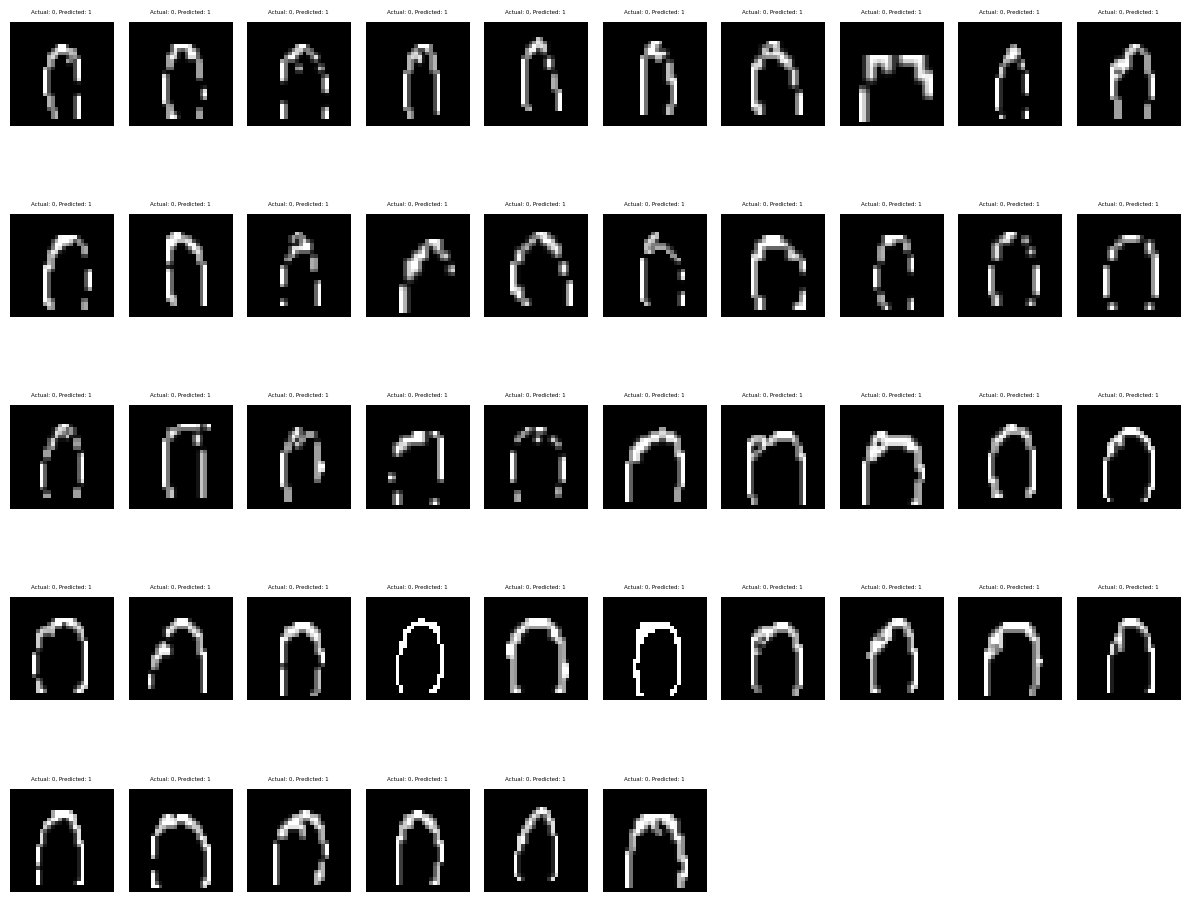

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming xx is your numpy array with 10000 samples of images of shape (10000, 28, 28)
# and y_xx contains the predicted values for each image, and yy contains the actual values

indices_to_plot = []  # Store indices where yy is 1 and y_xx is 0
for i in range(len(test_y)):
    if test_y[i] == 0 and preds[i] == 1:
        indices_to_plot.append(i)


# Fetch images with labels and predictions
selected_images = test_x[np.array(indices_to_plot)]  # Use np.array to correctly index the images
actual_labels = test_y[np.array(indices_to_plot)]
predicted_labels = preds[np.array(indices_to_plot)]

# Plotting the selected images
num_images = len(selected_images)
num_rows = 5
num_cols = int(np.ceil(num_images / num_rows))
plt.figure(figsize=(12, 10))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(selected_images[i], cmap='gray')
    plt.title(f"Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}", fontsize=4)
    plt.axis('off')

plt.tight_layout()
plt.show()


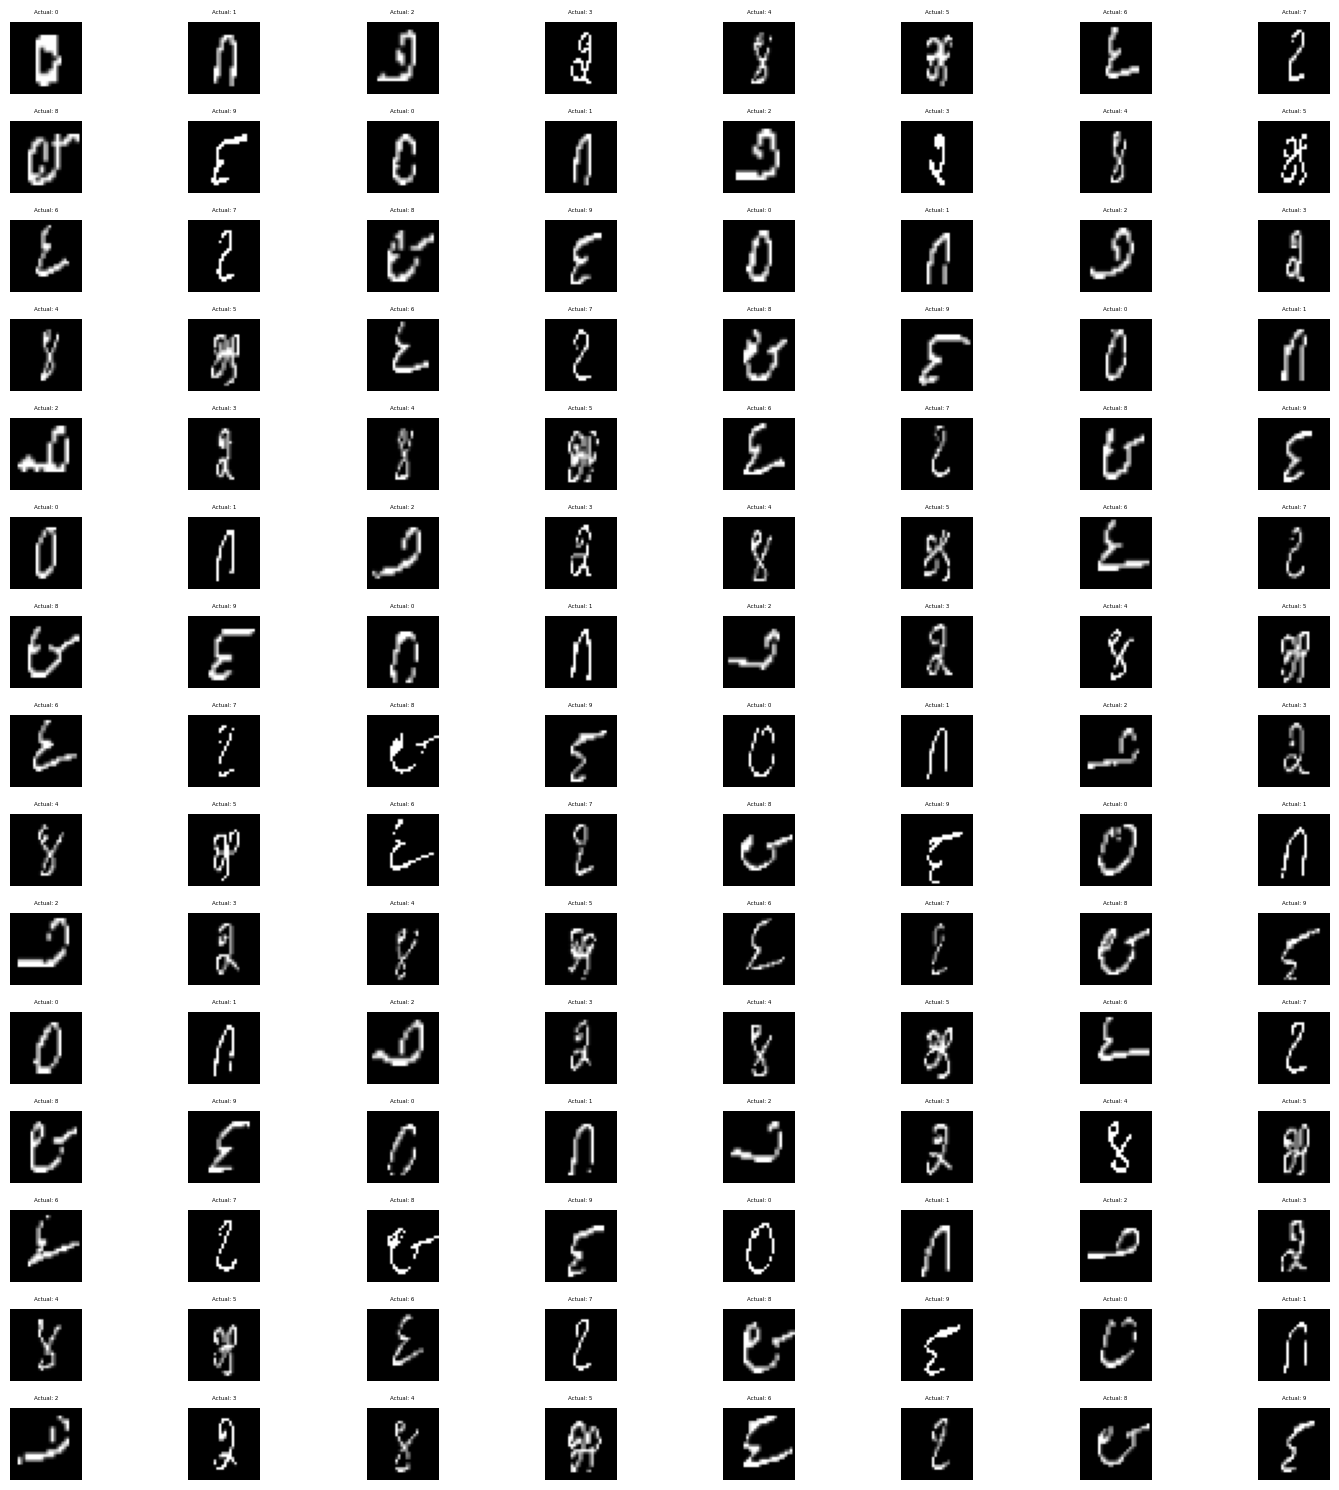

In [128]:
plt.figure(figsize=(15, 15))

for i in range(120):
    plt.subplot(15, 8, i + 1)
    plt.imshow(test_x[i], cmap='gray')
    plt.title(f"Actual: {test_y[i]}", fontsize=4)
    plt.axis('off')

plt.tight_layout()
#plt.show()

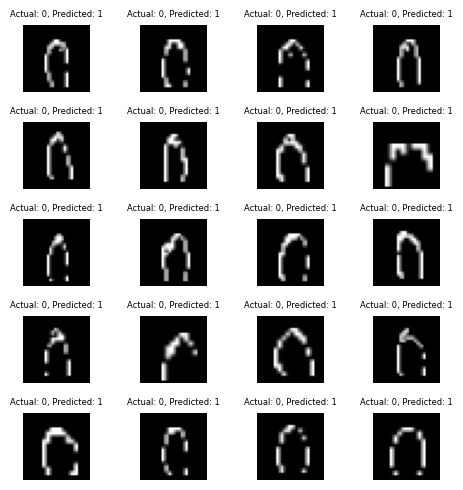

In [47]:
# my model predicted the below images as 1, but they are labelled as "0"
# i wanted to verify if they are actually okay to be labelled as "0", and guess what? they look like 1 to me lol. atleast most of them

plt.figure(figsize=(5, 5))

j = 0;
for i in indices_to_plot[:20]:
  plt.subplot(5, 4, j+1)
  plt.imshow(test_x[i], cmap='gray')
  plt.title(f"Actual: {test_y[i]}, Predicted: {preds[i]}", fontsize=6)
  plt.axis('off')
  j = j + 1;

plt.tight_layout()
plt.show()

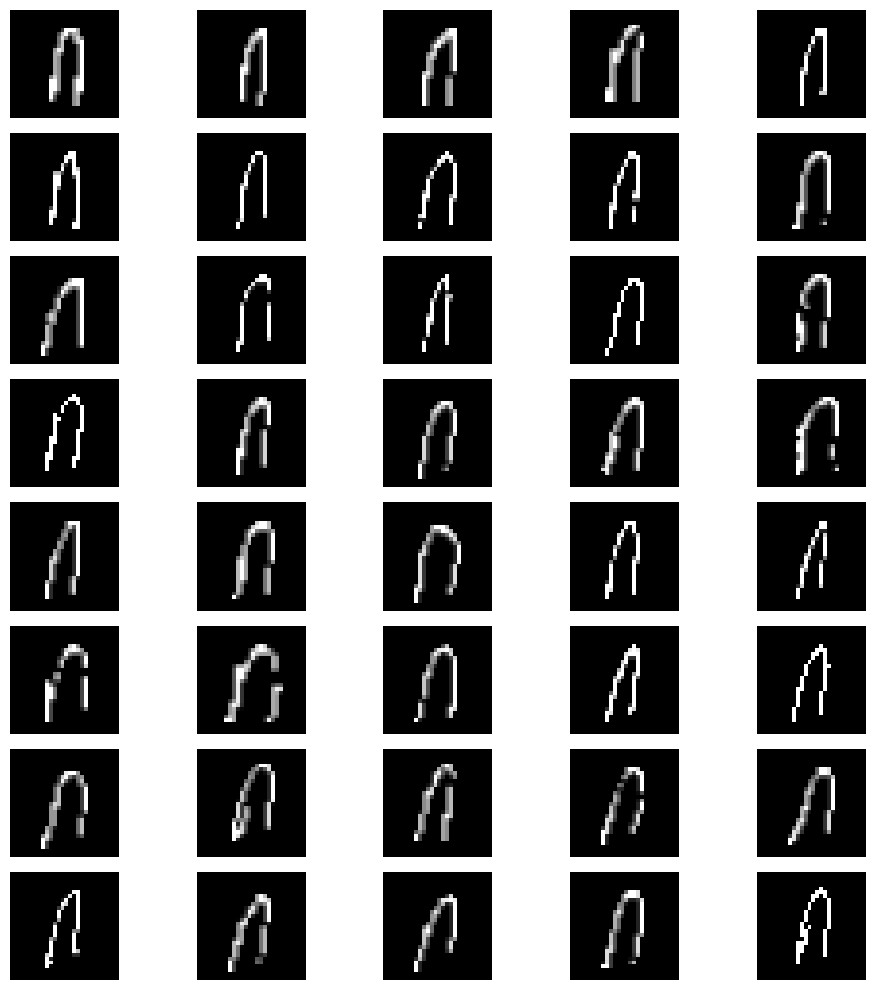

In [58]:
one_in_test = []
for i in range(len(test_y)):
  if test_y[i] == 1:
    one_in_test.append(i)


j = 0

plt.figure(figsize = (10, 10))
for i in range(40):
    plt.subplot(8, 5, j+1)
    plt.imshow(test_x[one_in_test[i]], cmap='gray')
    plt.axis('off')
    j = j + 1;

plt.tight_layout()
plt.show()


In [60]:
test =[[], [], [], [], [], [], [], [], [], []]

for i in range(len(test_y)):
   test[test_y[i]].append(i)




[[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840,

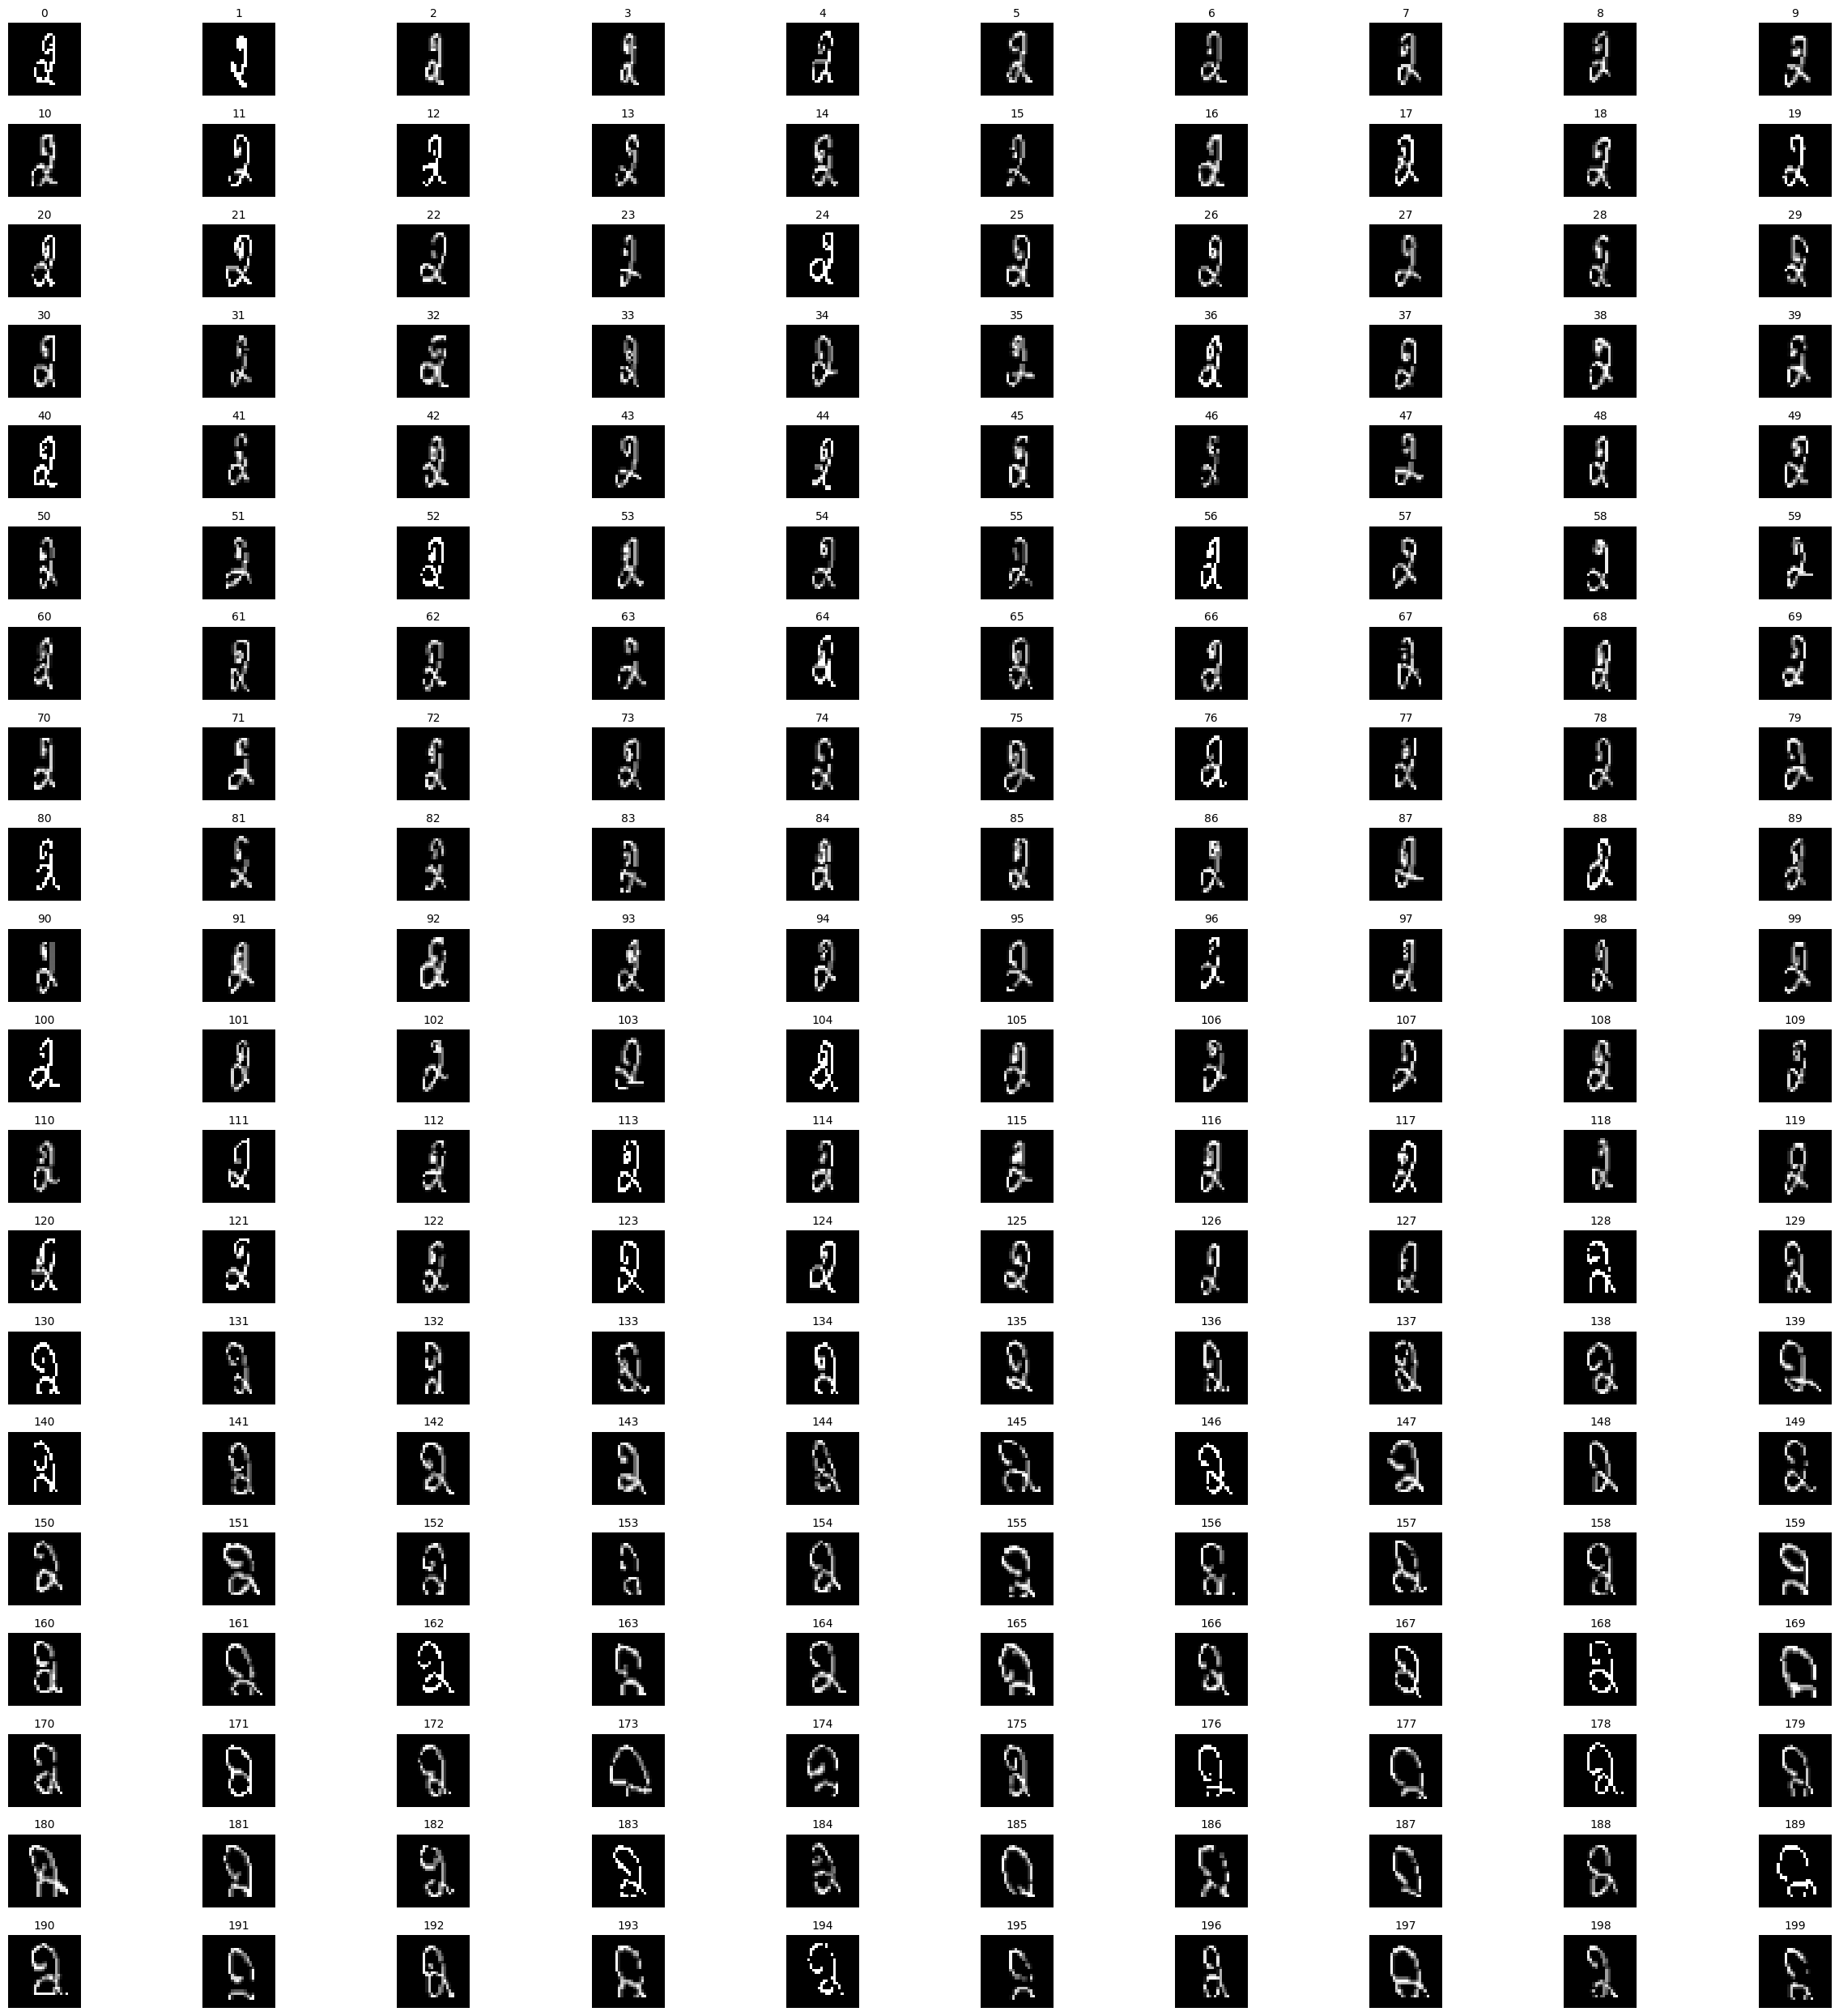

In [83]:
j = 0

plt.figure(figsize = (25, 25))

for i in range(200):
    plt.subplot(20, 10, j+1)
    plt.imshow(test_x[test[3][i]], cmap='gray')
    plt.title(i, fontsize=10)
    plt.axis('off')
    j = j + 1;

plt.tight_layout()
plt.show()

In [100]:
ind = []

for i in range(1000):
  if preds[test[3][i]] != 3 and preds[test[3][i]] == 1:
    ind.append(i)


In [113]:
ind

#plt.imshow(test_x[1693], cmap = 'gray')

#print(test_y[1693], preds[1693])

[169,
 173,
 174,
 176,
 177,
 185,
 191,
 267,
 291,
 306,
 313,
 343,
 359,
 363,
 367,
 371]

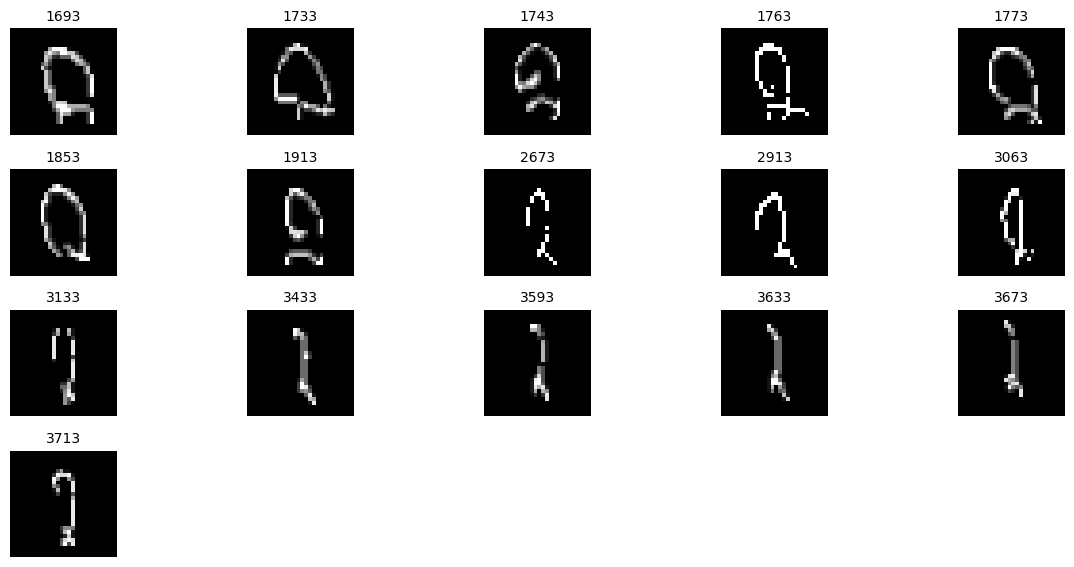

In [127]:
# my model predicted the below images as 1, but they are labelled as "3"

# i wanted to verify if they are actually okay to be labelled as "3", and some are a bit too divergent. consider the 1st and 6th
# images. do they deserve to be labelled as '3'?

j = 0

plt.figure(figsize = (12, 10))

for i in range(len(ind)):
    plt.subplot(7, 5, j+1)
    plt.imshow(test_x[test[3][ind[i]]], cmap='gray')
    plt.title(test[3][ind[i]], fontsize=10)
    plt.axis('off')
    j = j + 1;

plt.tight_layout()
plt.show()

In [127]:
# and it looks like our model survives this "3" and "1" mishape if we consider top 5 accuracy. 3 always lands in someplace there

In [133]:
np.set_printoptions(formatter={'float': '{:0.8f}'.format})

for i in range(16):
  print("\t\t\t\tImage ", i + 1, '\n', pred[test[3][ind[i]]], '\n\n')

				Image  1 
 [0.07031319 0.92403978 0.00487034 0.00036467 0.00002304 0.00021823
 0.00011168 0.00001637 0.00001006 0.00003271] 


				Image  2 
 [0.00518863 0.99467719 0.00012197 0.00000338 0.00000027 0.00000598
 0.00000160 0.00000085 0.00000001 0.00000021] 


				Image  3 
 [0.00125747 0.99851710 0.00013254 0.00004067 0.00000733 0.00000728
 0.00000218 0.00000294 0.00000003 0.00003250] 


				Image  4 
 [0.00000036 0.83930176 0.00000146 0.16066739 0.00000003 0.00002687
 0.00000006 0.00000207 0.00000000 0.00000002] 


				Image  5 
 [0.00823208 0.97514981 0.01093628 0.00460224 0.00011608 0.00054114
 0.00016517 0.00022553 0.00000073 0.00003092] 


				Image  6 
 [0.18594097 0.80194479 0.01175151 0.00028470 0.00000430 0.00003836
 0.00001346 0.00000972 0.00000662 0.00000550] 


				Image  7 
 [0.00612725 0.86408794 0.00252573 0.08554954 0.00112975 0.00214113
 0.00297026 0.03265269 0.00001506 0.00280064] 


				Image  8 
 [0.04471944 0.64408016 0.00242028 0.19495308 0.00549510 0.00281274
 

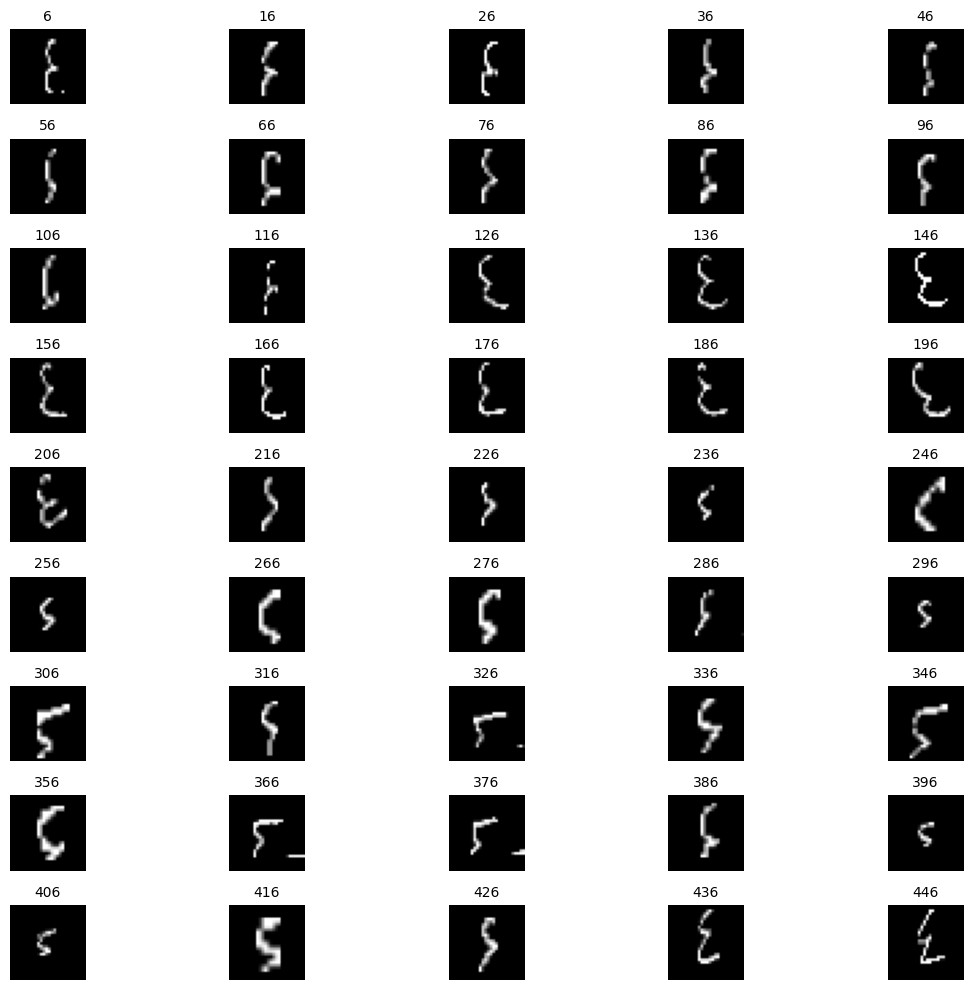

In [149]:
# we have similar results if we see our confusion matrix for test data for the "actually = 6" but we predicted as "9"

# and no surprise, we humans can also fail at this, so i dont think the model is to be blamed.
# although i do agree that we can train it deliberately on such images lol

ind = []

for i in range(1000):
  if preds[test[6][i]] != 6 and preds[test[6][i]] == 9:
    ind.append(i)

j = 0


plt.figure(figsize = (12, 10))

for i in range(len(ind)):
    plt.subplot(9, 5, j+1)
    plt.imshow(test_x[test[6][ind[i]]], cmap='gray')
    plt.title(test[6][i], fontsize=10)
    plt.axis('off')
    j = j + 1;

plt.tight_layout()
plt.show()

In [146]:
preds[286], test_y[286]

(6, 6)